<a href="https://colab.research.google.com/github/Roohiashahzad/Roohia_INFO5731_Spring2020/blob/main/RoohiaShahzad_In_Class_exercises_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 
    

In [2]:
#Reading from file
import pandas as pd
data = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")
data = data.head(5000)
data

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0


In [3]:
data.shape

(5000, 6)

In [4]:
data_after_removing_null_values = data.dropna()

In [5]:
data_after_removing_null_values.shape

(3422, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


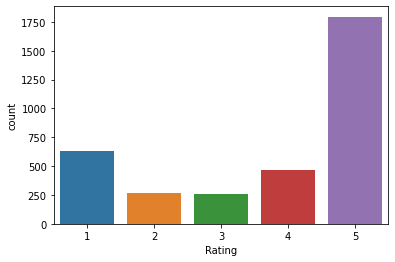

In [6]:
#Visualizing Ratings
import seaborn as sns
sns.countplot(data_after_removing_null_values.Rating)

In [7]:
#Classifying ratings as Positive or negative

def review_classification(rating):
    if rating < 3:
        return 'negative'
    return 'positive'

rating_classification = data_after_removing_null_values['Rating'].map(review_classification) 
data_after_removing_null_values['Rating'] = rating_classification

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [8]:
data_after_removing_null_values['Rating'].value_counts()

positive    2522
negative     900
Name: Rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


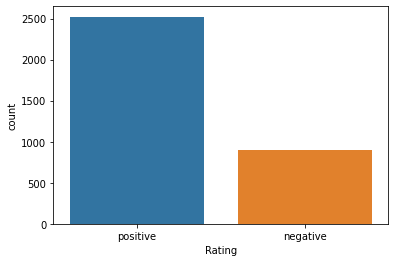

In [10]:
#Visualizing ratings

import seaborn as sns
sns.countplot(data_after_removing_null_values.Rating)

In [11]:
#Data Cleaning

import re
i=0;
for sent in data_after_removing_null_values['Reviews'].values:
    if (len(re.findall('<.*?>', sent))):
        print(i)
        print(sent)
        break;
    i += 1;

3205
Unless you know how to jail break this phone... what's the point? Most apps don't support this old phone. <(it's not really old, they just want you to spend money on the newer version. wtf? but whatever)>


In [12]:
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [13]:
#Transforming to Lower Case, Removing HTML Content, Removing Special Characters
import re
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: cleanhtml(x))
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [14]:
#Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data_after_removing_null_values['Cleaned Text'] = data_after_removing_null_values['Cleaned Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
#Kmeans using BagOfWords
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(data_after_removing_null_values['Cleaned Text'].values)

In [16]:
column_names = count_vect.get_feature_names()

In [17]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 10, init='k-means++', n_jobs = -1, random_state=99)
model.fit(bow)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [18]:
labels = model.labels_
cluster_center = model.cluster_centers_
cluster_center

array([[2.05479452e-02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.84931507e-03],
       [2.63059000e-03, 0.00000000e+00, 7.51597144e-04, ...,
        1.50319429e-03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [19]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.35392908766809134

In [20]:
df = data_after_removing_null_values
df['Bow Clus Label'] = model.labels_
df.groupby(['Bow Clus Label'])['Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Bow Clus Label
0     146
1    2661
2       1
3      36
4      21
5     548
6       2
7       3
8       2
9       2
Name: Reviews, dtype: int64

In [21]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: phone
 good
 screen
 use
 great
 one
 like
 battery
 really
 sim
Cluster 1: phone
 great
 good
 screen
 works
 price
 work
 like
 one
 love
Cluster 2: idol
 sound
 light
 like
 screen
 bass
 even
 5s
 version
 day
Cluster 3: phone
 screen
 good
 camera
 like
 battery
 one
 use
 idol
 great
Cluster 4: phone
 screen
 one
 like
 good
 camera
 would
 use
 phones
 get
Cluster 5: phone
 screen
 great
 good
 one
 would
 like
 price
 get
 battery
Cluster 6: phone
 camera
 tracfone
 idol
 data
 one
 use
 screen
 like
 time
Cluster 7: carrier
 iphone
 phone
 purchase
 compatible
 card
 unlocked
 sim
 provider
 purchased
Cluster 8: phone
 like
 good
 quality
 one
 camera
 really
 moto
 phones
 screen
Cluster 9: phone
 camera
 like
 great
 screen
 really
 price
 app
 use
 better


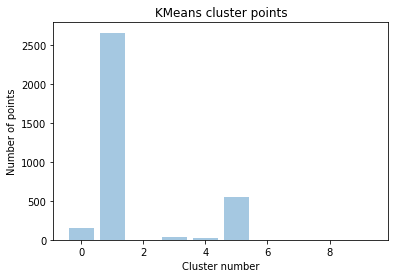

In [22]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(10)], df.groupby(['Bow Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [23]:
#KMeans using average words to vector
list_of_sentences = []
for sentence in data_after_removing_null_values['Cleaned Text'].values:
    list_of_sentences.append(sentence.split())

In [24]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sentences,size=100, workers=4)

In [25]:
import numpy as np
sent_vectors = []
for sent in list_of_sentences:
  sent_vec = np.zeros(100)
  cnt_words = 0
  for word in sent:
    try:
      vec = w2v_model.wv[word]
      sent_vec += vec
      cnt_words += 1
    except:
      pass
  sent_vec /= cnt_words
  sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


(3422, 100)

In [26]:
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

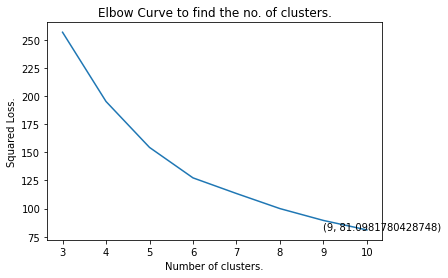

In [27]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors)
    squared_errors.append(kmeans.inertia_)
    
optimal_clusters = np.argmin(squared_errors) + 2 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

In [28]:
print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  81.0981780428748


In [29]:
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
word_cluster_pred = model2.predict(sent_vectors)
word_cluster_pred_2 = model2.labels_
word_cluster_center = model2.cluster_centers_
word_cluster_center[1:2]

array([[ 0.33992766, -0.17957168,  0.33542429,  0.12675293, -0.15059441,
        -0.06068224, -0.01014826, -0.14562792, -0.18584765,  0.1194858 ,
        -0.01008044, -0.0990592 , -0.17378708, -0.09011379,  0.23822891,
        -0.06125665, -0.22094683, -0.06807966, -0.19298662, -0.13785113,
         0.16185747,  0.01229616, -0.11768493,  0.52328435,  0.09108004,
         0.01876283, -0.05172658,  0.06346716,  0.09864704,  0.07473446,
         0.05188232,  0.09858001,  0.19318698, -0.27510849,  0.16427701,
         0.05125731,  0.05593586,  0.06879188,  0.27585168,  0.16512377,
        -0.15876216,  0.02044936,  0.39040515, -0.12358364, -0.02718426,
        -0.07038567, -0.21547697,  0.39331712, -0.03861684, -0.28004402,
        -0.43325413,  0.36115287,  0.25872979,  0.13750923,  0.06734328,
         0.24608442,  0.20784637,  0.64998474,  0.01603933, -0.09779046,
        -0.07500083, -0.14767165, -0.4198801 , -0.38139589,  0.14918004,
         0.0036553 , -0.67830714, -0.28117013, -0.1

In [43]:

dfa = df
dfa['AVG-W2V Clus Label'] = model2.labels_
dfa.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned Text,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...,5,3
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,5,7


In [45]:
dfa.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     344
1     517
2      61
3    1088
4      66
5     354
6      85
7     796
8     111
Name: Reviews, dtype: int64

In [46]:
# Reading a review which belong to each group.
for i in range(optimal_clusters):
    print("A review of assigned to cluster ", i)
    print("-" * 70)
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(dfa.iloc[dfa.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

A review of assigned to cluster  0
----------------------------------------------------------------------
Phone good just a little slow phone old but it's a great phone temporary right now. thank you for the great deal


Phone's speaker little low. Overall very happy with the phone. I would purchase another cell phone from Chubbietech. I am satisfied.


______________________________________________________________________
A review of assigned to cluster  1
----------------------------------------------------------------------
Very pleased


I originally was using the Samsung S2 Galaxy for Sprint and wanted to return back to the Samsung EPIC 4G for Sprint because I really missed the keyboard, I really liked the smaller compact size of the phone, and I still needed some of the basic functions of a smart phone (i.e. checking e-mail, getting directions, text messaging) Because the phone is not as powerful as the newer cell phones out there, just be aware that the more applications you ins

In [47]:
#DBScan clustering

from sklearn.cluster import DBSCAN
minPts = 2 * 100
def lower_bound(nums, target):
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 )
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist))
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [48]:
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

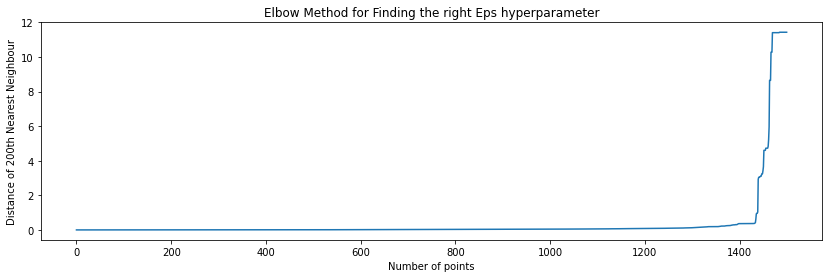

In [49]:
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [50]:
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=200, n_jobs=-1, p=None)

In [51]:
dbscandf = df
dbscandf['AVG-W2V Clus Label'] = model.labels_
dbscandf.groupby(['AVG-W2V Clus Label'])['Product Name', 'Brand Name', 'Reviews'].count()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Product Name,Brand Name,Reviews
AVG-W2V Clus Label,,,
0,3422,3422,3422


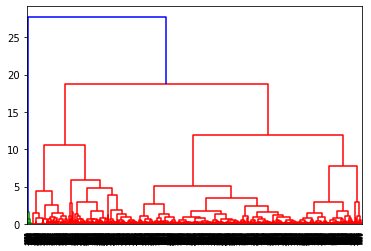

In [52]:
#Heirarchical Clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors, method='ward'))
plt.axhline(y=35)

In [59]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [62]:
hcdf = dbscandf
hcdf['AVG-W2V Clus Label'] = cluster.labels_
hcdf.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Cleaned Text,Bow Clus Label,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone us used hard phone...,5,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,5,1


In [64]:
hcdf.groupby(['AVG-W2V Clus Label'])['Reviews'].count()

AVG-W2V Clus Label
0     653
1    1630
2     711
3      61
4     367
Name: Reviews, dtype: int64

In [67]:
for i in range(5):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(hcdf.iloc[hcdf.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(hcdf.iloc[hcdf.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
Very pleased


The charging port was loose. I got that soldered in. Then needed a new battery as well. $100 later (not including cost of purchase) I have a usable phone. The phone should not have been sold in the state it was in.


______________________________________________________________________
2 reviews of assigned to cluster  1
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android p

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering. 

All three techniques are used for clustering the reviews. however KMeans Bag of Words performs better in grouping or clustering than DBScan and Hierarchical. Hierarchical doesnot cluster evenly using Bag of words and takes long run time as well. DBScan has the poorest performance as it groups all reviews into one cluster. 